Current testing:



In [4]:
from dataset import get_path, get_subjects, \
    read_raw, enrich_metadata, get_code_path, populate_metadata_epochs

import mne 

mne.set_log_level(verbose='error')

modality = "visual"
decoding_criterion = 'embeddings_multiple_words1'
subject = '5'
start = 'onset'
level = 'sentence'


In [ ]:
from dataset import analysis_subject, analysis

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9)


Reading raw files for modality: visual

 Epoching for run 1, subject: 5

Reading raw files for modality: visual

 Epoching for run 2, subject: 5

Reading raw files for modality: visual

 Epoching for run 3, subject: 5

Reading raw files for modality: visual

 Epoching for run 4, subject: 5



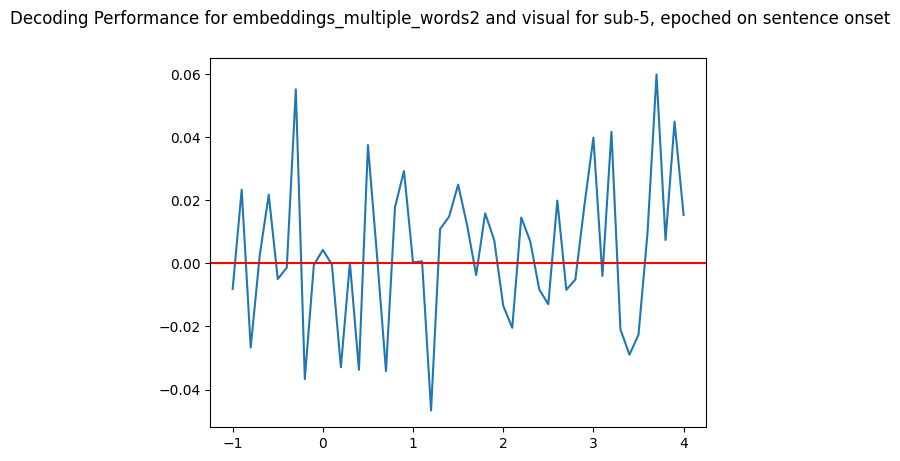

In [3]:
from dataset import unique_plot

unique_plot(subject, level, start, decoding_criterion, modality)

In [3]:
from utils import get_embeddings_disk
a = get_embeddings_disk(2, 4, 'sentence')
a.shape

(1024,)

# Testing

## Dataset functions


In [1]:
from dataset import get_path, get_subjects, \
    read_raw, enrich_metadata, get_code_path, populate_metadata_epochs

import mne 

mne.set_log_level(verbose='error')

### Path

In [2]:
modality = "visual"
decoding_criterion = 'embeddings'

path = get_path(modality)
subjects = get_subjects(path)

### Epoching and reading

In [5]:
subjects = get_subjects(path)
runs = 1
raw, meta = read_raw(subjects[0], runs)

Reading raw files for modality: visual

 Epoching for run 1, subject: 1



In [3]:
level = ('sentence')
start = ('onset')
decoding_criterion = 'embeddings'
runs = 1
epochs = populate_metadata_epochs(
    modality,
    subjects[0],
    level,
    start,
    runs,
    decoding_criterion
)


Reading raw files for modality: visual

 Epoching for run 1, subject: 1



In [14]:
import spacy
nlp = spacy.load("fr_core_news_sm")

In [17]:
nlp('hi').vector.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [12]:
epochs.metadata['sentence_words'][0][:2]

array(['Ça', 'représentait'], dtype=object)

In [25]:
import numpy as np
nb_words = 2
meta = epochs.metadata
all_embeddings = []
for level_id, df in meta.groupby(["run", f"{level}_id"]):
    emb_list = []
    for word_i in range(nb_words):
        word = df[f"{level}_words"].values[0][word_i]
        print(word)
        emb = nlp(word).vector
        emb_list.append(emb)
    summed_emb = np.sum(emb_list, axis=0)
    all_embeddings.append(summed_emb)
return all_embeddings

Ça
représentait
Voilà
la
On
disait
les
serpents
Ensuite
ils
J'ai
alors
Mon
dessin
Il
était
j'ai
montré
Elles
m'ont
Mon
dessin
Il
représentait
J'ai
alors
Elles
ont
Mon
dessin
les
grandes
C'est
ainsi
J'avais
été
Les
grandes
J'ai
donc
J'ai
volé
Et
la
Je
savais
C'est
très
J'ai
ainsi
J'ai
beaucoup
Je
les
Ça
n'a
Quand
j'en
Mais
toujours
Alors
je
Je
me
Je
lui
Et
la
J'ai
ainsi
Quelque
chose
Et
comme
C'était
pour
J'avais
à
Le
premier
J'étais
bien
Alors
vous
Elle
disait:
Dessine-moi
un
-hein!


IndexError: index 1 is out of bounds for axis 0 with size 1

In [30]:
for word_list in epochs.metadata.sentence_words:
    get_embeddings(word_list)
    
epochs.metadata['emb'] = epochs.metadata.sentence_words.apply(lambda lis: get_embeddings(lis).values)

TypeError: unhashable type: 'numpy.ndarray'

In [27]:
import pandas as pd
pd.DataFrame(epochs.metadata.sentence_words)

,sentence_words
0,"[Ça, représentait, un, serpent, boa, qui, aval..."
1,"[Voilà, la, copie, du, dessin.]"
2,"[On, disait, dans, le, livre:]"
3,"[les, serpents, boas, avalent, leur, proie, to..."
5,"[Ensuite, ils, ne, peuvent, plus, bouger, et, ..."
...,...
147,"[-mais, si, tu, ne, l'attaches, pas,, il, ira,..."
148,"[Et, mon, ami, eut, un, nouvel, éclat, de, rire:]"
150,"[-n'importe, où.]"
151,"[Droit, devant, lui...]"


In [19]:
embeddings = get_embeddings([list(x) for x in epochs.metadata.sentence_words.values])

TypeError: unhashable type: 'list'

### Metadata 

In [ ]:
meta_enriched = enrich_metadata(meta)


In [ ]:
meta_emb = add_embeddings(meta, runs, 'sentence')

In [8]:
from dataset import analysis_subject, analysis

In [10]:
scores = analysis('5', modality, 'onset', 'sentence', 'embeddings')

TypeError: analysis() takes 2 positional arguments but 5 were given

In [13]:
scores = analysis_subject('5', modality, 'onset', 'sentence', 'embeddings', runs=2)

Reading raw files for modality: visual

 Epoching for run 1, subject: 5



KeyboardInterrupt: 

In [6]:
scores

[{'subject': '5', 'score': -0.005700708596840172, 't': -1.0},
 {'subject': '5', 'score': 0.0003636261856574086, 't': -0.9},
 {'subject': '5', 'score': 0.005171559759872122, 't': -0.8},
 {'subject': '5', 'score': 0.019397647110331203, 't': -0.7},
 {'subject': '5', 'score': -0.0049271294480746205, 't': -0.6},
 {'subject': '5', 'score': 0.0036213037931488033, 't': -0.5},
 {'subject': '5', 'score': 0.006436182770548581, 't': -0.4},
 {'subject': '5', 'score': 0.011436335490883352, 't': -0.3},
 {'subject': '5', 'score': 0.02058327399458181, 't': -0.2},
 {'subject': '5', 'score': -0.006646514717284201, 't': -0.1},
 {'subject': '5', 'score': -0.004270029074008086, 't': 0.0},
 {'subject': '5', 'score': -0.0011537697160953627, 't': 0.1},
 {'subject': '5', 'score': 0.013331458254731143, 't': 0.2},
 {'subject': '5', 'score': 0.019750788111156912, 't': 0.3},
 {'subject': '5', 'score': 0.01568308961761889, 't': 0.4},
 {'subject': '5', 'score': 0.00697962600024185, 't': 0.5},
 {'subject': '5', 'score

## Utils functions

In [5]:
from utils import mne_events, decoding_from_criterion, add_syntax

In [ ]:
decoding_from_criterion('embeddings', epoch_add_metadata, starts, levels, subjects[0])

AttributeError: 'list' object has no attribute 'pick_types'

In [1]:
from dataset import check_plotting_possible
check_plotting_possible()

['auditory', 'visual']

In [ ]:
a = range

<Figure size 1280x800 with 0 Axes>

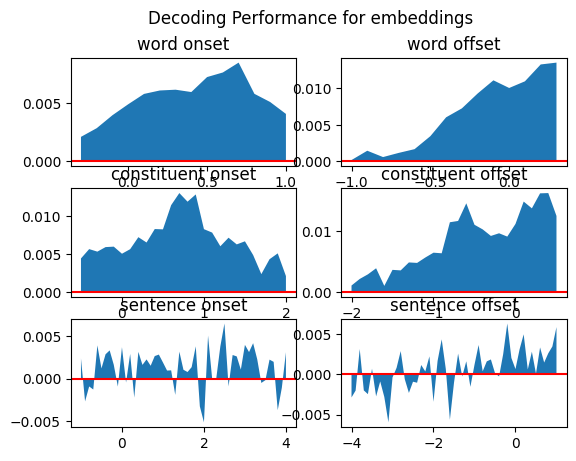

In [1]:
from dataset import plot_scores_debug
plot_scores_debug('auditory', 'embeddings')

<Figure size 1280x800 with 0 Axes>

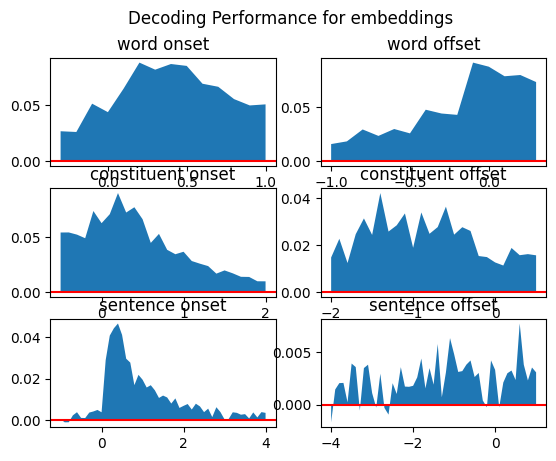

In [3]:
from dataset import plot_scores
modality = 'visual'; decoding = 'embeddings'
# load_scores('visual','embeddings')
plot_scores(modality, decoding)